# Fed-Batch Bioreactor

### Dilution Effect

### Python Implementation

### 1.Import library

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### 2.Define parameter

In [12]:
mumax = 0.20 # 1/hr
Ks = 1.00 # g/liter
Yxs = 0.5 # g/g
Ypx = 0.2 # g/g
Sf = 10.0 # g/liter

### 3.Necessary func

In [16]:
#inlet flowrate
def F(t):
    return 0.05
#reaction rates
def mu(S):
    return mumax*S/(Ks+S)
def Rg(X,S):
    return mu(S)*X
def Rp(X,S):
    return Ypx*Rg(X, S)


### 4.Differential equations

In [17]:
def xdot(x, t):
    X,P,S,V = x
    dX = -F(t)*X/V+Rg(X,S)
    dP = -F(t)*P/V+Rp(X,S)
    dS =  F(t)*(Sf-S)/V-Rg(X,S)/Yxs
    dV =  F(t)
    return [dX, dP, dS, dV]

### 5.Simulation

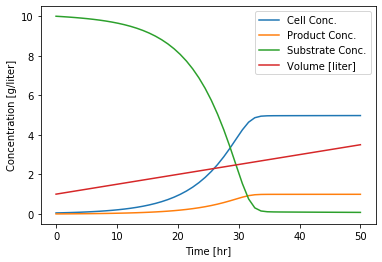

In [19]:
IC = [0.05, 0.0, 10.0, 1.0] #

t = np.linspace(0,50)
sol = odeint(xdot, IC, t)
X,P,S,V = sol.transpose()

#plot graph
plt.plot(t, X)
plt.plot(t, P)
plt.plot(t, S)
plt.plot(t, V)

plt.xlabel('Time [hr]')
plt.ylabel('Concentration [g/liter]')
plt.legend(['Cell Conc.',
           'Product Conc.',
           'Substrate Conc.',
           'Volume [liter]'])
plt.show()